In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pathlib import Path
import xarray as xr
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MaxNLocator,FixedLocator


In [2]:
gc = pd.read_pickle('GEOS-Chem/Fire/GC_4x5_Daily_FIRE3')

gc.columns = ['lat', 'lon', 'hour', 'VCD', 'Fire', 'Time']

gc['Time'] = gc['Time'].astype(int)
# Southeast Asia
gc = gc[(gc['lat']>12)&(gc['lat']<28)&(gc['lon']>92.5)&(gc['lon']<107.5)]
gc['Year'] = [math.floor(a/100) for a in gc['Time']]

gc['Month'] = gc['Time']-202100
gc['Month'] = [a - 100 if a >100 else a for a in gc['Month']]
gc = gc.sort_values('Month')
gc['Month'] = gc['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:"Apr"})
gc['VCD'] = gc['VCD'] / 1e15
gc

,lat,lon,hour,VCD,Fire,Time,Year,Month
3047,26.0,105.0,23,4.919648,Flat,202101,2021,Jan
2658,22.0,100.0,18,6.372916,Diurnal,202101,2021,Jan
2659,22.0,100.0,19,6.336425,Diurnal,202101,2021,Jan
2660,22.0,100.0,20,6.306908,Diurnal,202101,2021,Jan
2661,22.0,100.0,21,6.261170,Diurnal,202101,2021,Jan
...,...,...,...,...,...,...,...,...
3042,26.0,105.0,18,13.173597,Diurnal,202104,2021,Apr
3041,26.0,105.0,17,12.984938,Diurnal,202104,2021,Apr
3040,26.0,105.0,16,12.736319,Diurnal,202104,2021,Apr
1900,14.0,95.0,4,6.151932,Diurnal,202104,2021,Apr


In [3]:
gemslis = []
for path in Path('GEMS/Monthly_05x0625/').rglob('*99.nc'):
    gemslis.append(str(path))
# for path in Path('./ZonalTableSEA1015/').rglob('*2022*.csv'):
#     lisSEA.append(str(path))
gemslis

['GEMS/Monthly_05x0625/GEMS_HCHO_2022062245_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2023070145_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2021040045_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2022080645_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2021100245_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2020120345_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2021072245_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2022110245_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2021090645_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2023042345_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2022050045_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2021100645_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2022080245_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2021040445_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2023070545_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2022020345_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2022050445_GCN_PL99.nc',
 'GEMS/Monthly

In [4]:
gems = pd.DataFrame(columns = ['lat','lon','HCHO_column','Month','Year','hour'])

for i in gemslis:
    dfT = xr.open_dataset(i,engine='netcdf4').to_dataframe().reset_index().dropna()
    dfT = dfT[(dfT['lat']>12)&(dfT['lat']<28)&(dfT['lon']>92.5)&(dfT['lon']<107.5)]
    
    dfT['Month']=int(str(i)[-18:-16])
    dfT['Year']=int(str(i)[-22:-18])
    dfT['hour']=int(str(i)[-16:-14])
                    
    gems = pd.concat([gems,dfT])
gems['Year'] = gems['Year'].astype(int)

gems['hour'] = gems['hour'].astype(int)+1
gems['hour'] = [a-24 if a>=24 else a for a in gems['hour']]
gems['Month'] = gems['Month'].astype(int)
gems = gems.sort_values('Month')

gems['Month'] = gems['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:"Apr"})

# gems = gems[(gems['lat']>12)&(gems['lat']<28)&(gems['lon']>92.5)&(gems['lon']<107.5)].dropna()

gems

,lat,lon,HCHO_column,Month,Year,hour
11163,27.5,106.875,10.323487,Jan,2021,5
9575,22.0,104.375,5.977219,Jan,2022,3
9577,22.0,105.625,4.563973,Jan,2022,3
9578,22.0,106.250,4.535073,Jan,2022,3
9579,22.0,106.875,5.233490,Jan,2022,3
...,...,...,...,...,...,...
9139,20.5,101.875,4.525909,NaN,2022,5
9140,20.5,102.500,3.782870,NaN,2022,5
9141,20.5,103.125,3.468639,NaN,2022,5
9000,20.0,105.000,4.012992,NaN,2022,5


In [5]:
gems['hour'] = gems['hour'] + 7
gc['hour'] = gc['hour'] + 7
gems['hour'] = [a-24 if a>=24 else a for a in gems['hour']]
gc['hour'] = [a-24 if a>=24 else a for a in gc['hour']]


In [6]:
gems = gems.dropna()

In [7]:
gcMarch = gc[(gc['Month']=='Mar')&(gc['Fire'].isin(['Diurnal','None']))]
# gcMarch = gc[(gc['Month']=='Mar')&(gc['Fire'].isin(['Diurnal','None']))]
gcMarch


,lat,lon,hour,VCD,Fire,Time,Year,Month
1964,14.0,105.0,3,12.448627,None,202103,2021,Mar
1963,14.0,105.0,2,12.668327,None,202103,2021,Mar
1962,14.0,105.0,1,12.880074,None,202103,2021,Mar
1961,14.0,105.0,0,13.099497,None,202103,2021,Mar
1956,14.0,105.0,19,13.935530,None,202103,2021,Mar
...,...,...,...,...,...,...,...,...
1900,14.0,95.0,11,7.409430,None,202203,2022,Mar
3047,26.0,105.0,6,14.459007,None,202203,2022,Mar
1896,14.0,95.0,7,4.839706,Diurnal,202203,2022,Mar
1897,14.0,95.0,8,4.816609,Diurnal,202203,2022,Mar


In [8]:
gcMarchNW = gcMarch[(gcMarch['lat']>20)&(gcMarch['lat']<28)&(gcMarch['lon']>92.5)&(gcMarch['lon']<97.5)]
gcMarchNW = gcMarchNW.sort_values('Fire')

gcMarchNW

,lat,lon,hour,VCD,Fire,Time,Year,Month
2616,22.0,95.0,7,14.000143,Diurnal,202103,2021,Mar
2992,26.0,95.0,23,25.301014,Diurnal,202203,2022,Mar
2993,26.0,95.0,0,24.908787,Diurnal,202203,2022,Mar
2994,26.0,95.0,1,24.392332,Diurnal,202203,2022,Mar
2995,26.0,95.0,2,23.799589,Diurnal,202203,2022,Mar
...,...,...,...,...,...,...,...,...
2985,26.0,95.0,16,11.518919,None,202103,2021,Mar
2986,26.0,95.0,17,11.802246,None,202103,2021,Mar
2987,26.0,95.0,18,12.240391,None,202103,2021,Mar
2978,26.0,95.0,9,11.537823,None,202103,2021,Mar


In [9]:
gcMarchE = gcMarch[(gcMarch['lat']>20)&(gcMarch['lat']<24)&(gcMarch['lon']>102.5)&(gcMarch['lon']<107.5)]
gcMarchE

,lat,lon,hour,VCD,Fire,Time,Year,Month
2676,22.0,105.0,19,11.029008,None,202103,2021,Mar
2664,22.0,105.0,7,12.470987,None,202103,2021,Mar
2665,22.0,105.0,8,11.924489,None,202103,2021,Mar
2666,22.0,105.0,9,11.846055,None,202103,2021,Mar
2667,22.0,105.0,10,11.929042,None,202103,2021,Mar
...,...,...,...,...,...,...,...,...
2683,22.0,105.0,2,6.785050,Diurnal,202203,2022,Mar
2684,22.0,105.0,3,6.742412,Diurnal,202203,2022,Mar
2685,22.0,105.0,4,6.837352,Diurnal,202203,2022,Mar
2686,22.0,105.0,5,7.014689,Diurnal,202203,2022,Mar


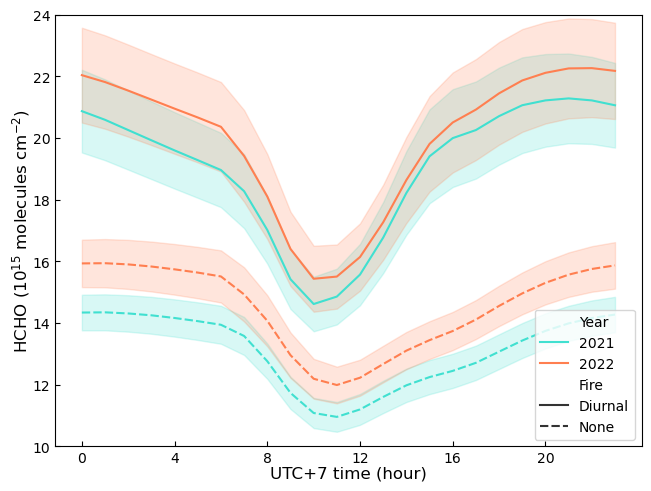

In [10]:
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature


def main():
    fig = plt.figure(layout="constrained",)
    plt.rcParams['figure.dpi']=300
#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#     ax.set_extent([60, 140, -10, 50], crs=ccrs.PlateCarree())
    ax = fig.add_subplot(1, 1, 1)
#     ax.set_extent([60, 140, -10, 50], crs=ccrs.PlateCarree())
#     ax.set_extent([80, 150, -15, 50], crs=ccrs.PlateCarree())
    sns.lineplot(data=gcMarchNW, x = 'hour',y='VCD',hue='Year',style='Fire',errorbar=('sd',0.25),
#                          ,legend=lgd,
                 palette = ['turquoise','coral']
                )
    ax.set_ylim(10,24)
    # plt.title(titles[i])
    #     a.yaxis.set_major_locator(FixedLocator([0,5,10,15,20,25])) 
    # plt.xaxis.set_major_locator(FixedLocator([0, 4,8,12,16,20,24]))
    ax.set_xlabel('UTC+7 time (hour)', labelpad = 0.5,color='black',size=12)
    ax.set_ylabel('HCHO (10$^{15}$ molecules cm$^{-2}$)', labelpad = 0.5,color='black',size=12)
    ax.tick_params(direction = 'in')
#     ax.yaxis.set_major_locator(FixedLocator([0,5,10,15,20,25])) 
    ax.xaxis.set_major_locator(FixedLocator([0, 4,8,12,16,20]))
    ax.legend(loc='lower right')

    plt.show()


if __name__ == '__main__':
    main()

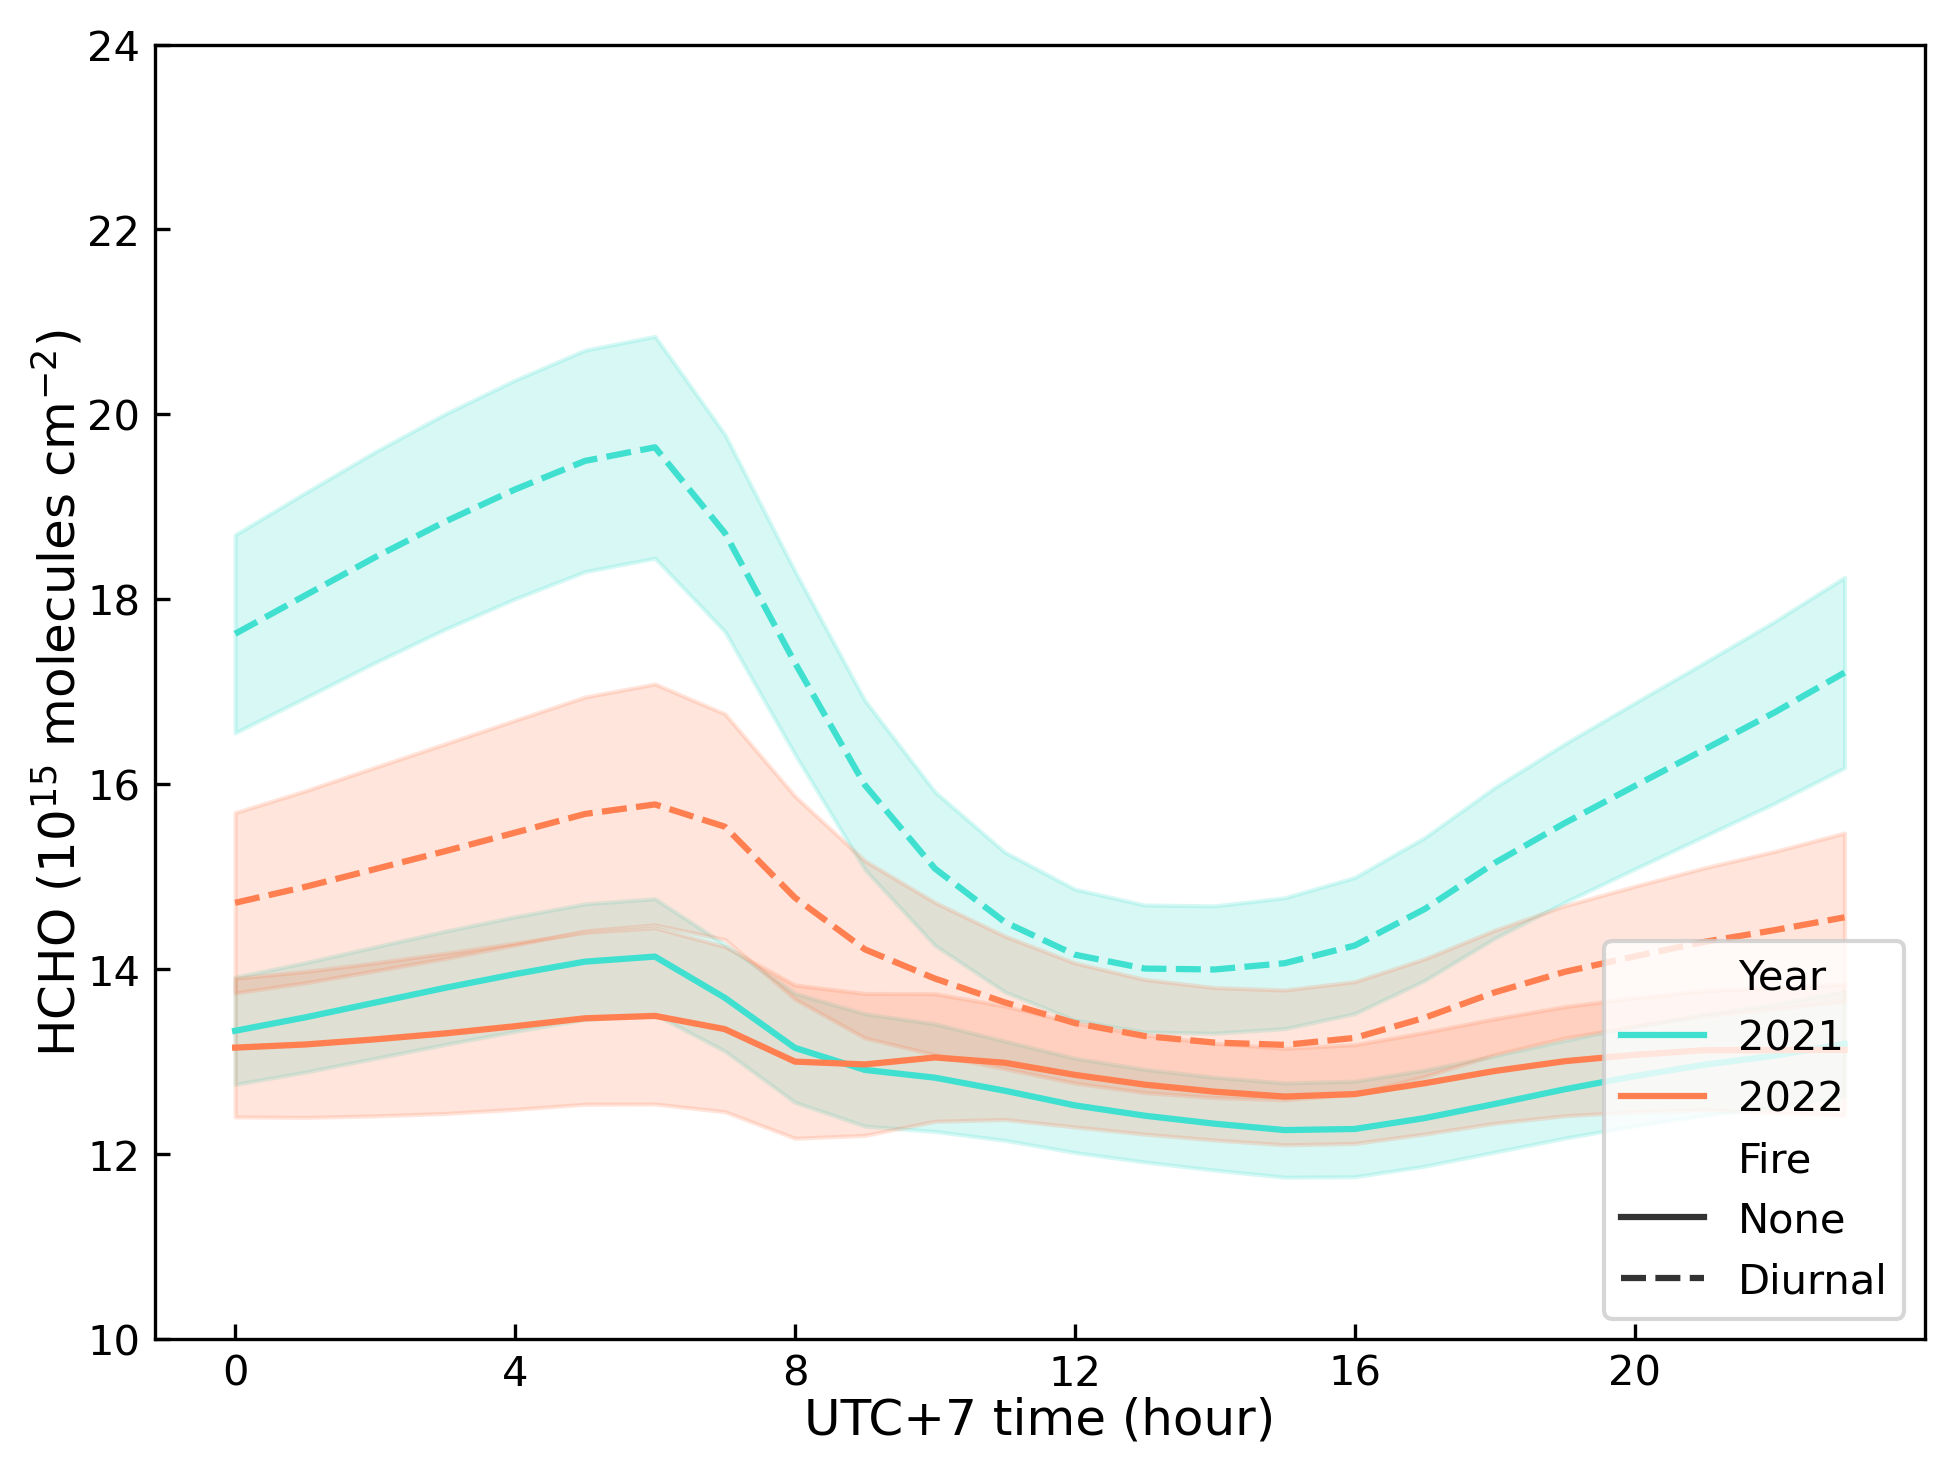

In [11]:
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature


def main():
    fig = plt.figure(layout="constrained",)
    plt.rcParams['figure.dpi']=300
#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#     ax.set_extent([60, 140, -10, 50], crs=ccrs.PlateCarree())
    ax = fig.add_subplot(1, 1, 1)
#     ax.set_extent([60, 140, -10, 50], crs=ccrs.PlateCarree())
#     ax.set_extent([80, 150, -15, 50], crs=ccrs.PlateCarree())
    sns.lineplot(data=gcMarchE, x = 'hour',y='VCD',hue='Year',style='Fire',errorbar=('sd',0.25),
#                          ,legend=lgd,
                 palette = ['turquoise','coral']
                )
    ax.set_ylim(10,24)
    # plt.title(titles[i])
    #     a.yaxis.set_major_locator(FixedLocator([0,5,10,15,20,25])) 
    # plt.xaxis.set_major_locator(FixedLocator([0, 4,8,12,16,20,24]))
    ax.set_xlabel('UTC+7 time (hour)', labelpad = 0.5,color='black',size=12)
    ax.set_ylabel('HCHO (10$^{15}$ molecules cm$^{-2}$)', labelpad = 0.5,color='black',size=12)
    ax.tick_params(direction = 'in')
#     ax.yaxis.set_major_locator(FixedLocator([0,5,10,15,20,25])) 
    ax.xaxis.set_major_locator(FixedLocator([0, 4,8,12,16,20]))
    ax.legend(loc='lower right')

    plt.show()


if __name__ == '__main__':
    main()